# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [54]:
#Import all the necessary modules
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
# importing ploting libraries
import matplotlib.pyplot as plt   
#importing seaborn for statistical plots
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [58]:
import warnings
warnings.filterwarnings('ignore')

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [27]:
colnames = ['preg', 'glu', 'bp', 'sft', 'ins', 'bmi', 'dpf', 'age', 'class']
prima_df = pd.read_csv("pima-indians-diabetes.data",names=colnames)

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [28]:
prima_df.head(10)

,preg,glu,bp,sft,ins,bmi,dpf,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [29]:
prima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
glu      768 non-null int64
bp       768 non-null int64
sft      768 non-null int64
ins      768 non-null int64
bmi      768 non-null float64
dpf      768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [30]:
prima_df['preg'] = prima_df['preg'].map( lambda x : prima_df.preg.mean() if x == 0 else x)
prima_df['glu'] = prima_df['glu'].map( lambda x : prima_df.glu.mean() if x == 0 else x)
prima_df['bp'] = prima_df['bp'].map( lambda x : prima_df.bp.mean() if x == 0 else x)
prima_df['sft'] = prima_df['sft'].map( lambda x : prima_df.sft.mean() if x == 0 else x)
prima_df['ins'] = prima_df['ins'].map( lambda x : prima_df.ins.mean() if x == 0 else x)

In [31]:
prima_df.head(10)

,preg,glu,bp,sft,ins,bmi,dpf,age,class
0,6.000000,148.0,72.000000,35.000000,79.799479,33.6,0.627,50,1
1,1.000000,85.0,66.000000,29.000000,79.799479,26.6,0.351,31,0
2,8.000000,183.0,64.000000,20.536458,79.799479,23.3,0.672,32,1
3,1.000000,89.0,66.000000,23.000000,94.000000,28.1,0.167,21,0
4,3.845052,137.0,40.000000,35.000000,168.000000,43.1,2.288,33,1
5,5.000000,116.0,74.000000,20.536458,79.799479,25.6,0.201,30,0
6,3.000000,78.0,50.000000,32.000000,88.000000,31.0,0.248,26,1
7,10.000000,115.0,69.105469,20.536458,79.799479,35.3,0.134,29,0
8,2.000000,197.0,70.000000,45.000000,543.000000,30.5,0.158,53,1
9,8.000000,125.0,96.000000,20.536458,79.799479,0.0,0.232,54,1


# Q5 Print the descriptive statistics of each & every column using describe() function

In [32]:
prima_df.describe()

,preg,glu,bp,sft,ins,bmi,dpf,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.400782,121.681605,72.254807,26.606479,118.660163,31.992578,0.471876,33.240885,0.348958
std,2.984162,30.436016,12.115932,9.631241,93.080358,7.884160,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,20.536458,79.799479,27.300000,0.243750,24.000000,0.000000
50%,3.845052,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

In [86]:
prima_df["class"].value_counts()

0    500
1    268
Name: class, dtype: int64

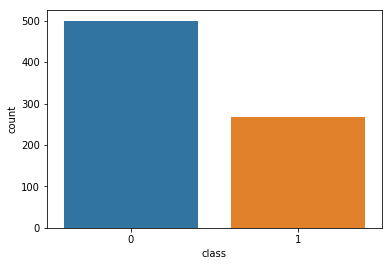

In [87]:
plot = sns.countplot(x = "class", data = prima_df)
plot.set_xticklabels(plot.get_xticklabels());

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

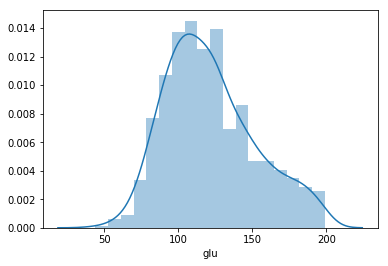

In [90]:
# Analyze the spread of the "glu" column

sns.distplot(prima_df["glu"], kde=True);

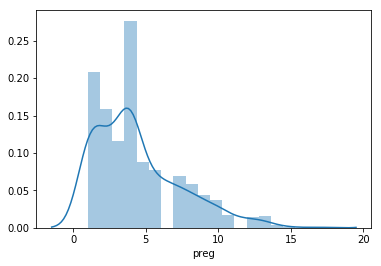

In [91]:
# Analyze the spread of the "Preg" column

sns.distplot(prima_df["preg"], kde=True);

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

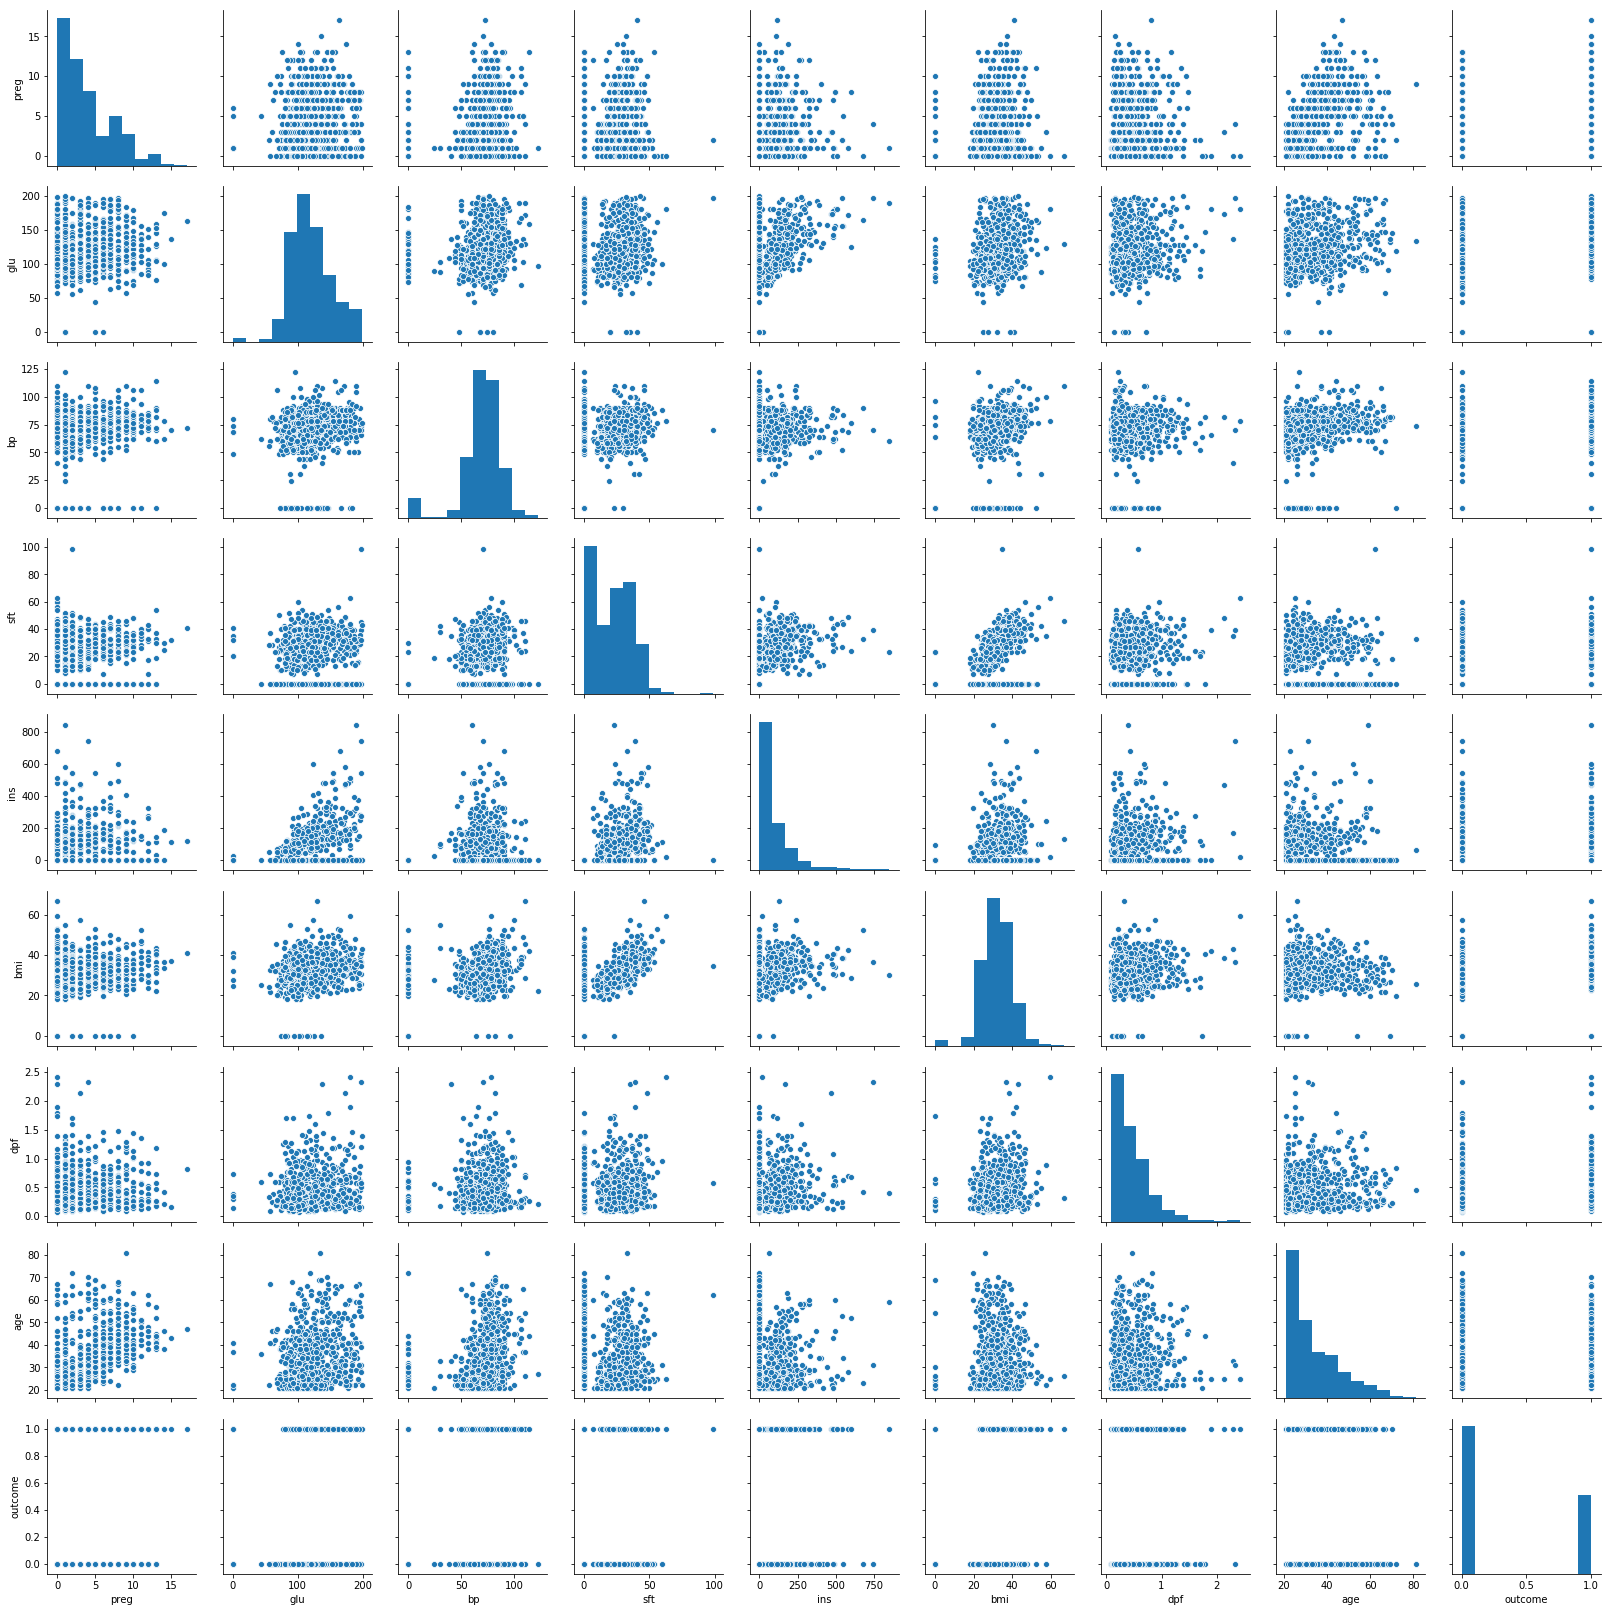

In [13]:
# Pairplot using sns
sns.pairplot(prima_df)

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [33]:
X = prima_df.drop("class", axis=1)
y = prima_df["class"]

In [36]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [39]:
Dt_model=DecisionTreeClassifier(max_depth=4,criterion='entropy',random_state=0)
#Fit Decision Tree Model
Dt_model.fit(X_train,y_train)

#Predict DT model with test data
ypred=Dt_model.predict(X_test)

# Q10 Print the accuracy of the model & print the confusion matrix 

In [47]:
#DT Model - Test data accuracy
accuracy=metrics.accuracy_score(y_test,ypred)
print("DT Model Accuracy : {0}".format(accuracy))
cm=metrics.confusion_matrix(y_test,ypred)
print("Confustion Matrix : \n{0}".format(cm))

DT Model Accuracy : 0.7272727272727273
Confustion Matrix : 
[[107  40]
 [ 23  61]]


Print the feature importance of the decision model - Optional

In [49]:
testRecall = metrics.recall_score(y_test, ypred)
testPrecision = metrics.precision_score(y_test, ypred)
testF1score = metrics.f1_score(y_test, ypred)

print("DT Model Recall : {0}".format(testRecall))
print("DT Model Precision : {0}".format(testPrecision))
print("DT Model F1 Score : {0}".format(testF1score))

DT Model Recall : 0.7261904761904762
DT Model Precision : 0.6039603960396039
DT Model F1 Score : 0.6594594594594594


# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [50]:
Rf_model = RandomForestClassifier(n_estimators=51,criterion='entropy',random_state=0 )

Rf_model.fit(X_train,y_train)


Rf_ypred=Rf_model.predict(X_test)

In [80]:
accuracy=metrics.accuracy_score(y_test,Rf_ypred)
print("RF Model Accuracy : {0}".format(accuracy))
cm=metrics.confusion_matrix(y_test,ypred)
print("RF Confustion Matrix : \n{0}".format(cm))

RF Model Accuracy : 0.7575757575757576
RF Confustion Matrix : 
[[107  40]
 [ 23  61]]


In [79]:
#Additional important feature for Random Forest
testRecall = metrics.recall_score(y_test, Rf_ypred)
testPrecision = metrics.precision_score(y_test, Rf_ypred)
testF1score = metrics.f1_score(y_test, Rf_ypred)

print("RF Model Recall : {0}".format(testRecall))
print("RF Model Precision : {0}".format(testPrecision))
print("RF Model F1 Score : {0}".format(testF1score))

RF Model Recall : 0.6547619047619048
RF Model Precision : 0.6707317073170732
RF Model F1 Score : 0.6626506024096386


# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [81]:
#base  model is Logistic Regression for the AdaBoost
base_LR=LogisticRegression(random_state=2)
boost_LR = AdaBoostClassifier(base_estimator=base_LR,n_estimators=50,random_state=2)

boost_LR.fit(X_train,y_train)


boost_ypred=boost_LR.predict(X_test)

In [82]:
accuracy=metrics.accuracy_score(y_test,boost_ypred)
print("Ada Boost Model Accuracy : {0}".format(accuracy))
cm=metrics.confusion_matrix(y_test,boost_ypred)
print("Ada Boost Confustion Matrix : \n{0}".format(cm))

Ada Boost Model Accuracy : 0.7575757575757576
Ada Boost Confustion Matrix : 
[[130  17]
 [ 39  45]]


In [83]:
#Additional important feature for Ada Boost
testRecall = metrics.recall_score(y_test, boost_ypred)
testPrecision = metrics.precision_score(y_test, boost_ypred)
testF1score = metrics.f1_score(y_test, boost_ypred)

print("Ada Boost Recall : {0}".format(testRecall))
print("Ada Boost Precision : {0}".format(testPrecision))
print("Ada Boost F1 Score : {0}".format(testF1score))

Ada Boost Recall : 0.5357142857142857
Ada Boost Precision : 0.7258064516129032
Ada Boost F1 Score : 0.6164383561643835


# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [65]:
#base  model is Logistic Regression for the AdaBoost
base_LR=LogisticRegression(random_state=2)
bag_LR=BaggingClassifier(base_estimator=base_LR,n_estimators=15,random_state=2)

bag_LR.fit(X_train,y_train)


bag_ypred=bag_LR.predict(X_test)

In [93]:
accuracy=metrics.accuracy_score(y_test,bag_ypred)
print("Bagging Classifier Model Accuracy : {0}".format(accuracy))
cm=metrics.confusion_matrix(y_test,bag_ypred)
print("Bagging Model Confustion Matrix : \n{0}".format(cm))

Bagging Classifier Model Accuracy : 0.7878787878787878
Bagging Model Confustion Matrix : 
[[132  15]
 [ 34  50]]


In [94]:
#Additional important feature for Bagging Classifier
testRecall = metrics.recall_score(y_test, bag_ypred)
testPrecision = metrics.precision_score(y_test, bag_ypred)
testF1score = metrics.f1_score(y_test, bag_ypred)

print("Bagging Classifier Recall : {0}".format(testRecall))
print("Bagging Classifier Precision : {0}".format(testPrecision))
print("Bagging Classifier F1 Score : {0}".format(testF1score))

Bagging Classifier Recall : 0.5952380952380952
Bagging Classifier Precision : 0.7692307692307693
Bagging Classifier F1 Score : 0.6711409395973155


# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [72]:
gb_model=GradientBoostingClassifier(n_estimators=50,random_state=2)

#Fit Model
gb_model.fit(X_train,y_train)

#Predict Gradient Boost
gb_ypred=gb_model.predict(X_test)

In [73]:
accuracy=metrics.accuracy_score(y_test,gb_ypred)
print("Gradient Boost Model Accuracy : {0}".format(accuracy))
cm=metrics.confusion_matrix(y_test,gb_ypred)
print("Gradient Boost Confustion Matrix : \n{0}".format(cm))

Gradient Boost Model Accuracy : 0.7705627705627706
Gradient Boost Confustion Matrix : 
[[122  25]
 [ 28  56]]


In [ ]:
#Additional important feature for Gradient Boost
testRecall = metrics.recall_score(y_test, gb_ypred)
testPrecision = metrics.precision_score(y_test, gb_ypred)
testF1score = metrics.f1_score(y_test, gb_ypred)

print("Bagging Classifier Recall : {0}".format(testRecall))
print("Bagging Classifier Precision : {0}".format(testPrecision))
print("Bagging Classifier F1 Score : {0}".format(testF1score))

# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.

In [74]:

stacked = VotingClassifier(estimators = [('Boosted_LR',bag_LR),('RF', Rf_model), ('GB', gb_model)],voting='soft')

#Fit Model
stacked.fit(X_train,y_train)

#Predict stack
stacked_ypred=stacked.predict(X_test)

In [76]:
accuracy=metrics.accuracy_score(y_test,stacked_ypred)
print("Stacked Model Accuracy : {0}".format(accuracy))
cm=metrics.confusion_matrix(y_test,stacked_ypred)
print("Stacked Confustion Matrix : \n{0}".format(cm))

Stacked Model Accuracy : 0.7748917748917749
Stacked Confustion Matrix : 
[[124  23]
 [ 29  55]]
